In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal

In [2]:
def ampspec(y: np.ndarray, sr: int):
    librosa.display.specshow(
        librosa.amplitude_to_db(
            np.abs(librosa.stft(y, hop_length=1024)),
            ref=np.max
        ),
        y_axis='log',
        x_axis='time',
        sr=sr
    )

def melspec(y: np.ndarray, sr: int):
    mel = librosa.feature.melspectrogram(
        y=y,
        sr=sr,
        n_fft=1024,
        hop_length=512
    )
    mel = librosa.power_to_db(mel, ref=np.max)
    librosa.display.specshow(mel, y_axis='mel', fmax=16384, x_axis='time')

In [18]:
y, sr = librosa.load('../audio(wideo)/non_animal/D_non-contrast_1/D_non-contrast_1/REC69.WAV')
# y, sr = librosa.load('../audio(wideo)/animal/muscle_animal_1/muscle_animal_1/REC69.WAV')

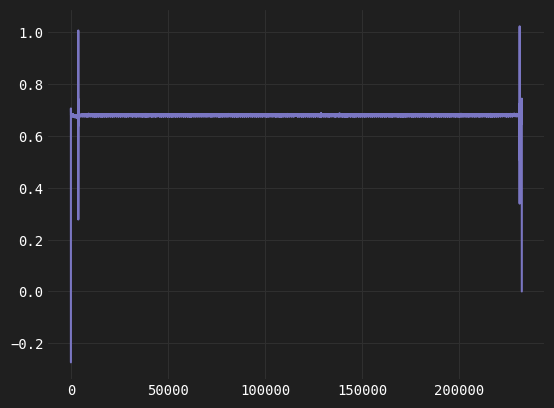

In [27]:
# librosa.display.waveshow(y, sr=sr)
plt.plot(y)

In [31]:
sl = slice(
    *librosa.time_to_samples(
        [1, librosa.get_duration(y=y, sr=sr) - 1], 
        sr=sr
    )
)
yn = librosa.util.normalize(y[sl])
ys = y[sl]

In [24]:
yn = librosa.util.normalize(ys)

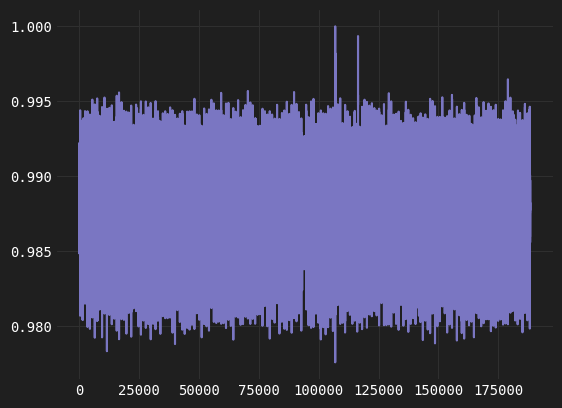

In [29]:
plt.plot(yn)

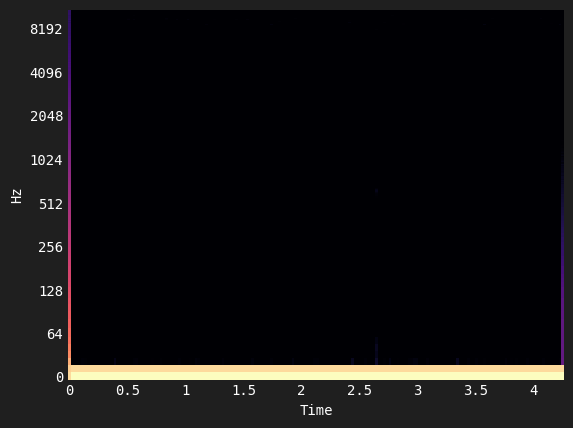

In [21]:
ampspec(yn, sr)

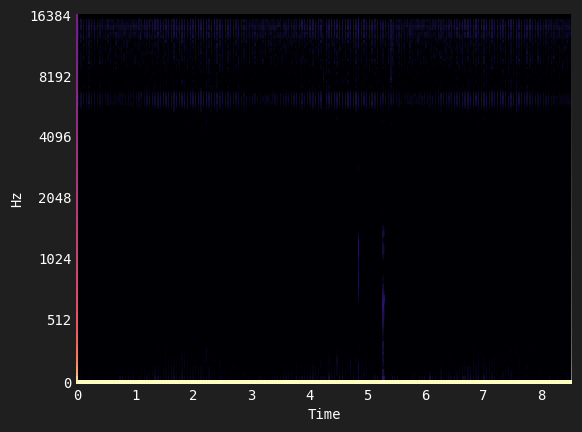

In [32]:
melspec(yn, sr)

In [33]:
def butter_bandpass(lowcut: int, highcut: int, sr: int, order: int = 5):
    return scipy.signal.butter(order, [lowcut / sr, highcut / sr], btype='band')

yf = scipy.signal.lfilter(
    *butter_bandpass(512, 2048, sr, order=3),
    yn
)

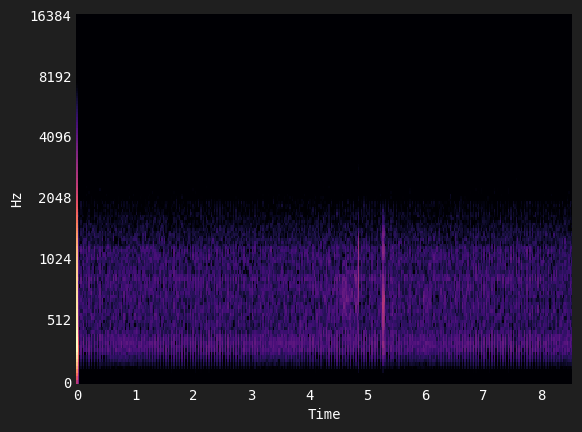

In [34]:
melspec(yf, sr)

In [35]:
onset = librosa.onset.onset_strength(
    y=yf,
    sr=sr,
    hop_length=128,
    aggregate=lambda y, axis: np.percentile(y, 90, axis=axis)
)

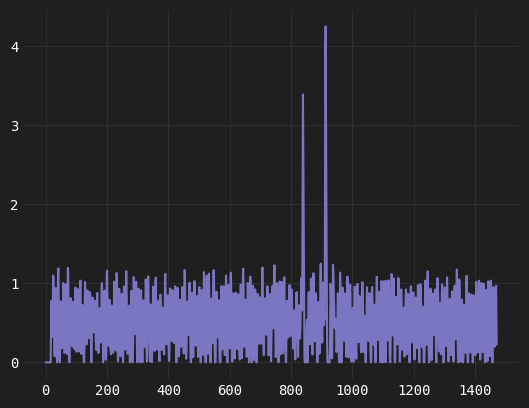

In [36]:
plt.style.use('./style.mplstyle')
plt.plot(onset)

In [37]:
peaks = librosa.util.peak_pick(
    onset,
    pre_max=3,
    post_max=3,
    pre_avg=3,
    post_avg=3,
    delta=1.1,
    wait=10
)

In [38]:
librosa.frames_to_time(peaks, sr=sr, hop_length=128)

array([4.87038549, 5.29995465])